# **Deep Learning Lab: Transfer Learning**

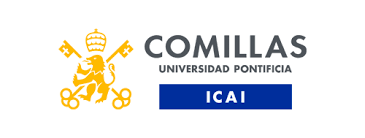

***

## Import libraries

In [1]:
from cnn import CNN
import torchvision
from cnn import load_data
from cnn import load_model_weights
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import wandb #https://docs.wandb.ai/ref/python/

## Log in to Weights & Biases

In [2]:
# Load environment variables from .env file
env_file = '.env'
if os.path.exists(env_file):
    with open(env_file) as f:
        env_vars = json.load(f)
        os.environ.update(env_vars)
        # Log in to Wandb using API key from environment variables
        wandb.login(key=os.getenv('WANDB_API_KEY'))
else:
    print(f'No {env_file} file found. Please create one with the following format:')
    print('{')
    print('  "WANDB_API_KEY": "your_wandb_api_key"')
    print('}')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: elena-cabrera (deep-learning-mbd). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\elena\.netrc


## Data directory

In [3]:
# Configure data directories
train_dir = './dataset/training'
valid_dir = './dataset/validation'

## ResNet50 Model

In [4]:
# Set parameters
img_size = 224 # ResNet50 input size
epochs = 10
batch_size = 32
learning_rate = 0.001
unfreezed_layers = 2
criterion = nn.CrossEntropyLoss()

In [5]:
# Initialize Wandb project and experiment
wandb.init(
    # Project
    project='cnn',
    # Run name
    name='resnet50',
    # Configurations
    config={
        'model': 'resnet50',
        'epochs': epochs,
        'batch_size': batch_size,
        'learning_rate': learning_rate,
        'unfreezed_layers': unfreezed_layers,
        'criterion': 'CrossEntropyLoss',
    }
)

In [6]:
# Load data and model
train_loader, valid_loader, num_classes = load_data(train_dir, 
                                                    valid_dir, 
                                                    batch_size=batch_size,
                                                    img_size=img_size)

model = CNN(torchvision.models.resnet50(weights='DEFAULT'), num_classes, unfreezed_layers=unfreezed_layers)

In [7]:
# Train model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
history = model.train_model(train_loader, valid_loader, optimizer, criterion, epochs=epochs)

Epoch 1/10 - Train Loss: 2.4164, Train Accuracy: 0.4231
Epoch 1/10 - Validation Loss: 2.2677, Validation Accuracy: 0.5573
Epoch 2/10 - Train Loss: 2.2322, Train Accuracy: 0.6017
Epoch 2/10 - Validation Loss: 2.1450, Validation Accuracy: 0.6800
Epoch 3/10 - Train Loss: 2.1743, Train Accuracy: 0.6529
Epoch 3/10 - Validation Loss: 2.1173, Validation Accuracy: 0.7013
Epoch 4/10 - Train Loss: 2.1676, Train Accuracy: 0.6590
Epoch 4/10 - Validation Loss: 2.1337, Validation Accuracy: 0.6820
Epoch 5/10 - Train Loss: 2.1608, Train Accuracy: 0.6620
Epoch 5/10 - Validation Loss: 2.1072, Validation Accuracy: 0.7120
Epoch 6/10 - Train Loss: 2.1429, Train Accuracy: 0.6838
Epoch 6/10 - Validation Loss: 2.1083, Validation Accuracy: 0.7100
Epoch 7/10 - Train Loss: 2.1340, Train Accuracy: 0.6884
Epoch 7/10 - Validation Loss: 2.1110, Validation Accuracy: 0.7053
Epoch 8/10 - Train Loss: 2.1381, Train Accuracy: 0.6807
Epoch 8/10 - Validation Loss: 2.1035, Validation Accuracy: 0.7107
Epoch 9/10 - Train Loss:

In [8]:
# Finish run
wandb.finish()

Train Accuracy,▁▆▇▇▇█████
Train Loss,█▄▂▂▂▁▁▁▁▁
Validation Accuracy,▁▆▇▇████▇█
Validation Loss,█▃▂▂▁▁▁▁▂▁
Train Accuracy,0.68543
Train Loss,2.13216
Validation Accuracy,0.71533
Validation Loss,2.10306


In [9]:
# Save model
model.save(f'resnet50-{epochs}epochs-{unfreezed_layers}unfreezedlayers')